In [1]:
using Compat, Random, Distributions, Plots, LinearAlgebra, Statistics, LaTeXStrings, SparseArrays, CPUTime, JLD2
using SpecialFunctions, GSL, SuiteSparse, Distributed, Roots, NBInclude
gr(fmt=:png)
e = 2.7182818284
@nbinclude("setup.ipynb")
Random.seed!(1);

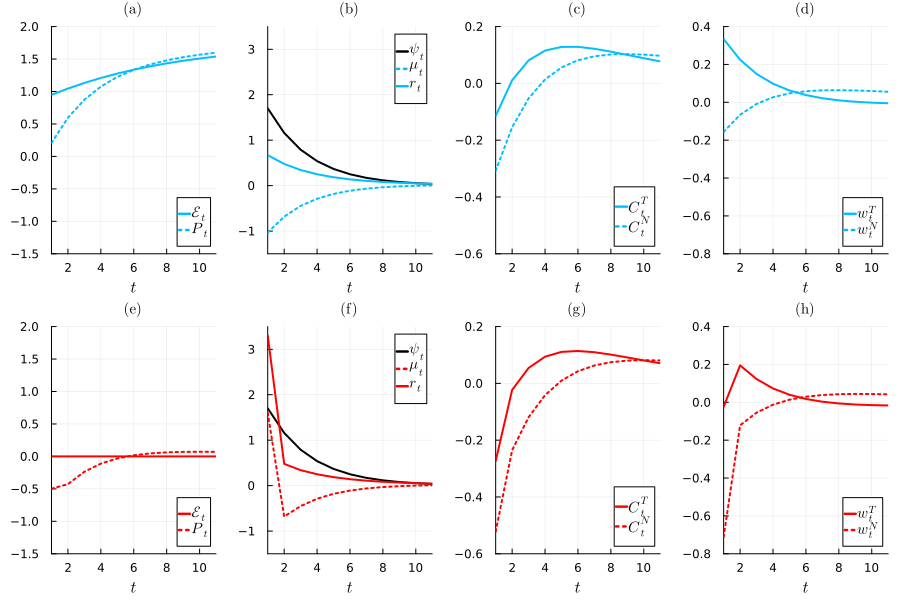

In [2]:
# set the time grid
T = 600
dt = T/1200
T_bar = 24
time_grid = collect(0:dt:T)
L = length(time_grid)
ψ = 0.02/12*exp.(-time_grid/12*1.15)

# set up matrices that convert monthly responses to quarterly
Lq = Int64((L-1)/8)
A = Diagonal(ones(Lq))
b = ones(8)'/8
Q = hcat(kron(A,b),zeros(Lq))
Tq_bar = 11
tq_grid = time_grid[9:8:end]/4

# load parameters
@load "steady_state_output.jld2"

# plot IRF
@load "transition_results/float.jld2"
res_float = res_this
@load "transition_results/peg.jld2"
res_peg = res_this

P_float = exp.(cumsum(vcat(0,res_float.π_sequence[1:end-1]) * dt))
E_float = P_float.*res_float.pF_sequence
plot_PE_float = plot(tq_grid,100*(Q*E_float-ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"\mathcal{E}_t",legend=:bottomright,ylim=[-1.5,2],title=L"\mathrm{(a)}")
plot!(tq_grid,100*(Q*P_float-ones(Lq)),color=:deepskyblue,lw=2,ls=:dot,label=L"P_t")
plot_ψ_float = plot(tq_grid,12*100*Q*ψ,xlim=[1,Tq_bar],color=:black,lw=2,label=L"\psi_t",ylim=[-1.5,3.5],title=L"\mathrm{(b)}")
plot!(tq_grid,12*100*Q*res_float.μ_sequence,color=:deepskyblue,lw=2,ls=:dot,label=L"\mu_t")
plot!(tq_grid,12*100*(Q*res_float.rd_sequence-ones(Lq)*par.r_d),color=:deepskyblue,lw=2,label=L"r_t")
plot_C_float = plot(tq_grid,100*(Q*res_float.cT_sequence/res_float.cT_sequence[end]-ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"C^T_t",legend=:bottomright,ylim=[-0.6,0.2],title=L"\mathrm{(c)}")
plot!(tq_grid,100*(Q*res_float.cN_sequence/res_float.cN_sequence[end]-ones(Lq)),color=:deepskyblue,lw=2,ls=:dot,label=L"C^N_t")
plot_w_float = plot(tq_grid,100*(Q*res_float.wT_sequence-ones(Lq)*res_float.wT_sequence[end]),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"w^T_t",legend=:bottomright,ylim=[-0.8,0.4],title=L"\mathrm{(d)}")
plot!(tq_grid,100*(Q*res_float.wN_sequence-ones(Lq)*res_float.wN_sequence[end]),color=:deepskyblue,lw=2,ls=:dot,label=L"w^N_t")

P_peg = exp.(cumsum(vcat(0,res_peg.π_sequence[1:end-1]) * dt))
E_peg = P_peg .* res_peg.pF_sequence
plot_PE_peg = plot(tq_grid,100*(Q*E_peg-ones(Lq)),xlim=[1,Tq_bar],color=:red,lw=2,label=L"\mathcal{E}_t",legend=:bottomright,ylim=[-1.5,2],title=L"\mathrm{(e)}")
plot!(tq_grid,100*(Q*P_peg-ones(Lq)),color=:red,lw=2,ls=:dot,label=L"P_t")
plot_ψ_peg = plot(tq_grid,12*100*Q*ψ,xlim=[1,Tq_bar],color=:black,lw=2,label=L"\psi_t",ylim=[-1.5,3.5],title=L"\mathrm{(f)}")
plot!(tq_grid,12*100*Q*res_peg.μ_sequence,color=:red,lw=2,ls=:dot,label=L"\mu_t")
plot!(tq_grid,12*100*(Q*res_peg.rd_sequence-ones(Lq)*par.r_d),color=:red,lw=2,label=L"r_t")
plot_C_peg = plot(tq_grid,100*(Q*res_peg.cT_sequence/res_peg.cT_sequence[end]-ones(Lq)),xlim=[1,Tq_bar],color=:red,lw=2,label=L"C^T_t",legend=:bottomright,ylim=[-0.6,0.2],title=L"\mathrm{(g)}")
plot!(tq_grid,100*(Q*res_peg.cN_sequence/res_peg.cN_sequence[end]-ones(Lq)),color=:red,lw=2,ls=:dot,label=L"C^N_t")
plot_w_peg = plot(tq_grid,100*(Q*res_peg.wT_sequence-ones(Lq)*res_peg.wT_sequence[end]),xlim=[1,Tq_bar],color=:red,lw=2,label=L"w^T_t",legend=:bottomright,ylim=[-0.8,0.4],title=L"\mathrm{(h)}")
plot!(tq_grid,100*(Q*res_peg.wN_sequence-ones(Lq)*res_peg.wN_sequence[end]),color=:red,lw=2,ls=:dot,label=L"w^N_t")

l = @layout[a a a a; a a a a]
plot(plot_PE_float,plot_ψ_float,plot_C_float,plot_w_float,plot_PE_peg,plot_ψ_peg,plot_C_peg,plot_w_peg,layout=l,size=(900,600),legendfontsize=10,titlefontsize=10,xlabel=L"t")

In [3]:
png("graphs/basic_IRF.png")

"graphs/basic_IRF.png"